In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

In [ ]:
#importing data set

company=pd.read_csv("/content/Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
# Checking null entries

company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
# Cheking info

company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


<Axes: xlabel='Sales', ylabel='Income'>

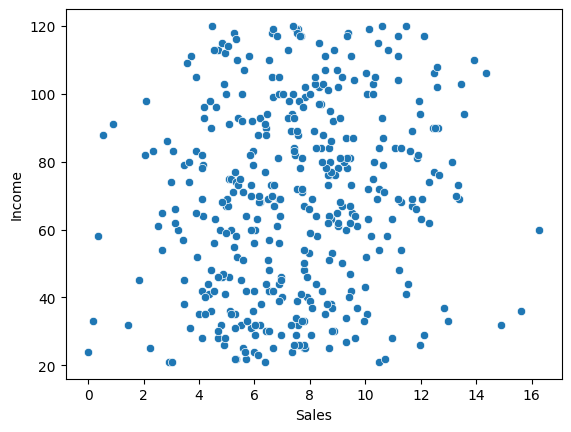

In [ ]:
# Visulasing the data

sns.scatterplot(x="Sales",y="Income",data=company)

In [ ]:
# Performing the label encoding to convert categorical data to numeric

le=LabelEncoder()
company["ShelveLoc"]=le.fit_transform(company["ShelveLoc"])
company["Urban"]=le.fit_transform(company["Urban"])
company["US"]=le.fit_transform(company["US"])
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [ ]:
# Splitting data into X and Y variable
x=company.iloc[:,0:6]
y=company.iloc[:,6]

# **Model Building by Random Forest classifier**

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=1)

In [ ]:
model=RandomForestClassifier(n_estimators=100,max_features=3) # Instead of random state we use max_features in Random Forest

kfold=KFold(n_splits=10)

result=cross_val_score(model,x,y,cv=kfold)
print(result.mean()*100)

64.5


# **We will Try to built by Adaboost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model1=AdaBoostClassifier(n_estimators=100,random_state=1)

result1=cross_val_score(model1,x,y,cv=kfold)
result1.mean()

0.6675000000000001

# **We can see that the accuracy imporved a bit after classsifing with AdaBoostClassifier**

# **We will build a model by RandomForest Regressor**

In [ ]:
model3=RandomForestRegressor(n_estimators=100,max_features=7)

result3=cross_val_score(model3,x,y,cv=kfold)
result3.mean()



0.031744611044481154